# PHY3 — Manipulation 8 : Cellules photovoltaïques  
_Notebook prêt pour le labo — 2025-11-09_

## Mode d'emploi

- Remplis les tableaux de mesures dans chaque section (les DataFrames) puis exécute les cellules en dessous.
- Tous les tracés utilisent **matplotlib** (pas de seaborn), un graphique par figure.
- Les fonctions calculent automatiquement : I(U), P=UI, P_MPP, FF, eta, R_int, etc.
- Les variables importantes sont regroupées au début de chaque section.

## 1) U_oc et I_sc en fonction de l'intensité et de la surface éclairée

**Objectif.** Mesurer puis comparer U_oc (tension en circuit ouvert) et I_sc (courant en court-circuit) :
- (a) quand on fait varier l'intensité lumineuse via le nombre d'ampoules actives,
- (b) quand on fait varier la surface active de la cellule (fraction de surface éclairée).

**Ce que tu dois entrer :**
- Le nombre d'ampoules (1 a 4 selon le set-up) et, pour chacune, les mesures de U_oc, I_sc.
- La fraction de surface éclairée (par ex. 0.0, 0.25, 0.5, 0.75) et, pour chacune, U_oc, I_sc.

**Ce que le code fait :**
- Traces U_oc et I_sc en fonction du nombre d'ampoules et de la fraction de surface.
- Ajustement lineaire simple de controle et affichage des parametres.

 nb_ampoules  Uoc_V   Isc_A
           1  0.493 0.01171
           2  0.520 0.02474
           3  0.529 0.03846
           4  0.536 0.04730
 fraction_surface  Uoc_V   Isc_A
             0.00  0.536 0.04730
             0.25  0.533 0.03657
             0.50  0.514 0.02077
             0.75  0.488 0.01080
Fit Uoc vs #ampoules: Uoc ~ 0.0138 * N + 0.485 (R^2=0.894)
Fit Isc vs #ampoules: Isc ~ 0.01205 * N + 0.00043 (R^2=0.992)


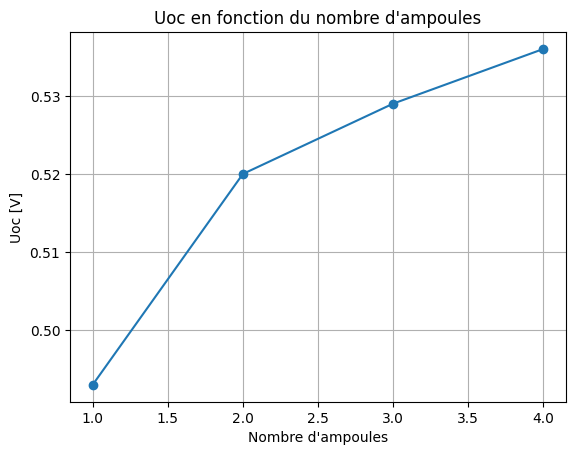

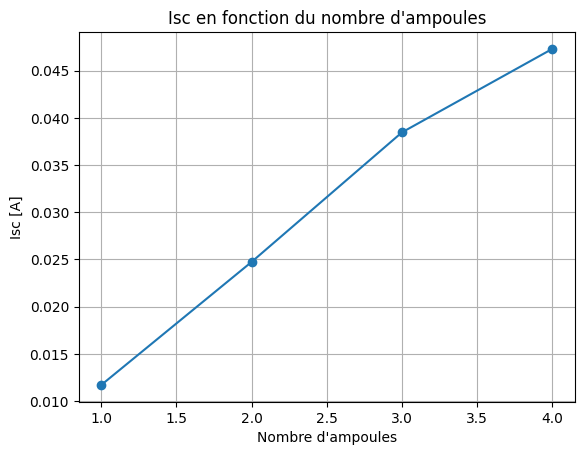

Fit Uoc vs surface: Uoc ~ -0.0652 * s + 0.5422 (R^2=0.907)
Fit Isc vs surface: Isc ~ -0.05012 * s + 0.04766 (R^2=0.992)


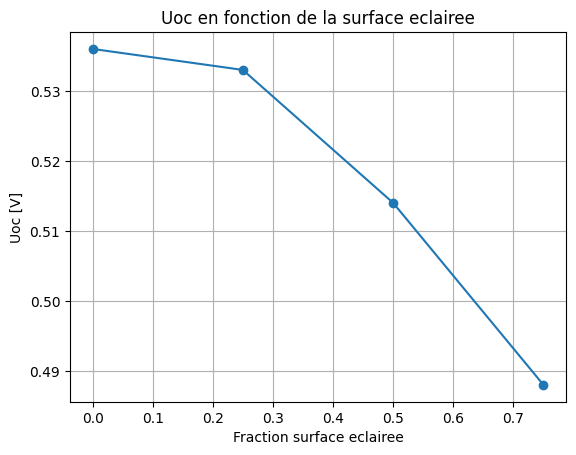

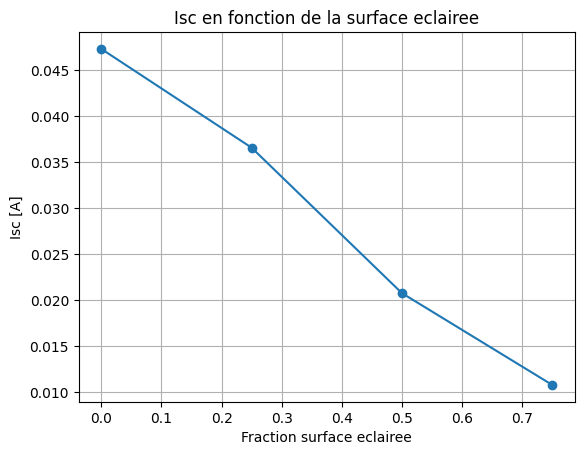

In [ ]:

# --- Imports generaux (utilises dans tout le notebook) ---
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- (a) Donnees: variation d'intensite via le nombre d'ampoules ---
# Remplir ton tableau de mesures ici. Unite: Uoc [V], Isc [A].
data_lamps = pd.DataFrame({
    "nb_ampoules": [1, 2, 3, 4],
    "Uoc_V":       [0.493, 0.520, 0.529, 0.536],
    "Isc_A":       [0.01171, 0.02474, 0.03846, 0.0473],
})

# --- (b) Donnees: variation de surface eclairee ---
# Utilise une fraction de surface (0.0 -> 100% couvert, 0.75 -> 75% de la surface eclairee, etc.).
data_surface = pd.DataFrame({
    "fraction_surface": [0.0, 0.25, 0.5, 0.75],
    "Uoc_V":            [0.536, 0.533, 0.514, 0.488],
    "Isc_A":            [0.0473, 0.03657, 0.02077, 0.01080],
})

print(data_lamps.to_string(index=False))
print(data_surface.to_string(index=False))


# --- Outils de trace simples ---
def quick_linfit(x, y):
    "Retourne (a, b) du fit y ~ a*x + b, et R^2."
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x, y = x[mask], y[mask]
    if len(x) < 2:
        return np.nan, np.nan, np.nan
    A = np.vstack([x, np.ones_like(x)]).T
    a, b = np.linalg.lstsq(A, y, rcond=None)[0]
    ypred = a*x + b
    ss_res = np.sum((y - ypred)**2)
    ss_tot = np.sum((y - y.mean())**2) if len(y) > 1 else np.nan
    r2 = 1 - ss_res/ss_tot if ss_tot and not np.isnan(ss_tot) else np.nan
    return a, b, r2

def plot_xy(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- Traces (a) ---
aU, bU, r2U = quick_linfit(data_lamps["nb_ampoules"], data_lamps["Uoc_V"])
aI, bI, r2I = quick_linfit(data_lamps["nb_ampoules"], data_lamps["Isc_A"])
print(f"Fit Uoc vs #ampoules: Uoc ~ {aU:.4g} * N + {bU:.4g} (R^2={r2U:.3g})")
print(f"Fit Isc vs #ampoules: Isc ~ {aI:.4g} * N + {bI:.4g} (R^2={r2I:.3g})")

plot_xy(data_lamps["nb_ampoules"], data_lamps["Uoc_V"], "Nombre d'ampoules", "Uoc [V]",
        "Uoc en fonction du nombre d'ampoules")
plot_xy(data_lamps["nb_ampoules"], data_lamps["Isc_A"], "Nombre d'ampoules", "Isc [A]",
        "Isc en fonction du nombre d'ampoules")

# --- Traces (b) ---
aUs, bUs, r2Us = quick_linfit(data_surface["fraction_surface"], data_surface["Uoc_V"])
aIs, bIs, r2Is = quick_linfit(data_surface["fraction_surface"], data_surface["Isc_A"])
print(f"Fit Uoc vs surface: Uoc ~ {aUs:.4g} * s + {bUs:.4g} (R^2={r2Us:.3g})")
print(f"Fit Isc vs surface: Isc ~ {aIs:.4g} * s + {bIs:.4g} (R^2={r2Is:.3g})")

plot_xy(data_surface["fraction_surface"], data_surface["Uoc_V"], "Fraction surface eclairee", "Uoc [V]",
        "Uoc en fonction de la surface eclairee")
plot_xy(data_surface["fraction_surface"], data_surface["Isc_A"], "Fraction surface eclairee", "Isc [A]",
        "Isc en fonction de la surface eclairee")


## 2) Resistance interne R_int de la cellule

Principe (loi des mailles): U_charge + U_oc - U_int = 0, donc U_int = U_oc - U_charge et R_int = (U_oc - U_charge)/I.

Ce que tu dois entrer :
- U_oc (mesure sans charge dans les memes conditions d'eclairement).
- Pour chaque charge R: la tension U_charge aux bornes de la charge et le courant I.

Ce que le code fait :
- Calcule R_int par point et trace R_int en fonction de R.
- Verifie la loi des mailles via un residu numerique simple.

,R_load_ohm,Ucharge_V,I_A
0,100.0,0.52102,0.00524
1,50.0,0.50764,0.01014
2,33.3,0.49500,0.01488


,R_load_ohm,Ucharge_V,I_A,Uint_V,Rint_ohm,kirchhoff_residual_V
0,100.0,0.52102,0.00524,0.01498,2.858779,1.04204
1,50.0,0.50764,0.01014,0.02836,2.796844,1.01528
2,33.3,0.49500,0.01488,0.04100,2.755376,0.99000


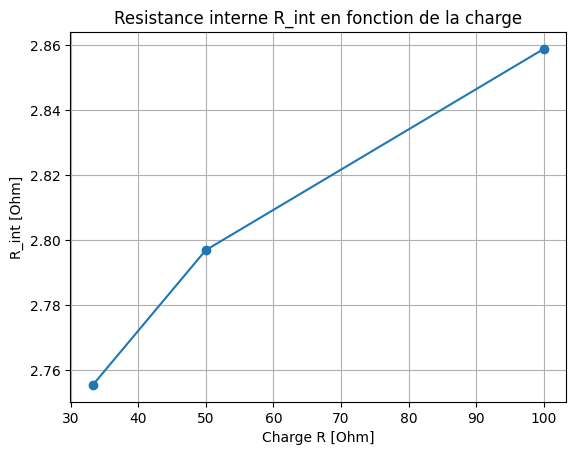

R_int (mediane, Ohm) : 2.7968441814595715
Ecart-type (Ohm)     : 0.04248854596874334


In [27]:

# Donnees a entrer (une ligne par charge utilisee)
Uoc_V = 0.536  # a renseigner (V) pour ces conditions d'eclairement

data_rint = pd.DataFrame({
    "R_load_ohm":  [100, 50, 33.3],
    "Ucharge_V":   [0.52102,0.50764, 0.495],   # tension mesuree aux bornes de la charge
    "I_A":         [0.00524,0.01014, 0.01488],   # courant mesure
})

display(data_rint.head())

def compute_rint(df, Uoc):
    df = df.copy()
    df["Uint_V"] = Uoc - df["Ucharge_V"]
    df["Rint_ohm"] = df["Uint_V"] / df["I_A"]
    df["kirchhoff_residual_V"] = df["Ucharge_V"] + Uoc - df["Uint_V"]
    return df

res_rint = compute_rint(data_rint, Uoc_V)
display(res_rint)

# Trace Rint vs R_load
mask = ~res_rint["Rint_ohm"].isna()
plt.figure()
plt.plot(res_rint.loc[mask, "R_load_ohm"], res_rint.loc[mask, "Rint_ohm"], marker='o')
plt.xlabel("Charge R [Ohm]")
plt.ylabel("R_int [Ohm]")
plt.title("Resistance interne R_int en fonction de la charge")
plt.grid(True)
plt.show()

# Resume numerique
print("R_int (mediane, Ohm) :", np.nanmedian(res_rint["Rint_ohm"].values))
print("Ecart-type (Ohm)     :", np.nanstd(res_rint["Rint_ohm"].values))


## 3) Caracteristique I(U), P_MPP, Fill Factor (FF) et rendement eta

Definitions utiles:
- P = U*I ; le point de puissance maximale P_MPP est le point de la courbe I(U) qui maximise P.
- FF = P_MPP / (I_sc * U_oc).
- eta = P_MPP / P_in, avec P_in = E * A (irradiance E multipliee par l'aire eclairee A).

Ce que tu dois entrer :
- Deux series de mesures pour 2 intensites (par ex. 1 ampoule et 3 ampoules). Pour chaque serie : U_oc, I_sc, et une table (R, U, I) balayant la charge.
- L'aire eclairee de la cellule (en cm^2) et l'irradiance par ampoule (en mW/cm^2).

Ce que le code fait :
- Trace I(U) et superpose la puissance P(U), marque le MPP.
- Calcule FF et eta pour chaque condition d'eclairement.

,R_ohm,U_V,I_A
0,1101.0,0.476,0.000429
1,900.0,0.479,0.000530
2,700.0,0.481,0.000684
3,500.0,0.482,0.000958
4,300.6,0.482,0.001598


,R_ohm,U_V,I_A
0,1101.0,0.512,0.000462
1,900.0,0.519,0.000573
2,700.0,0.517,0.000735
3,500.0,0.522,0.001043
4,300.6,0.522,0.001730


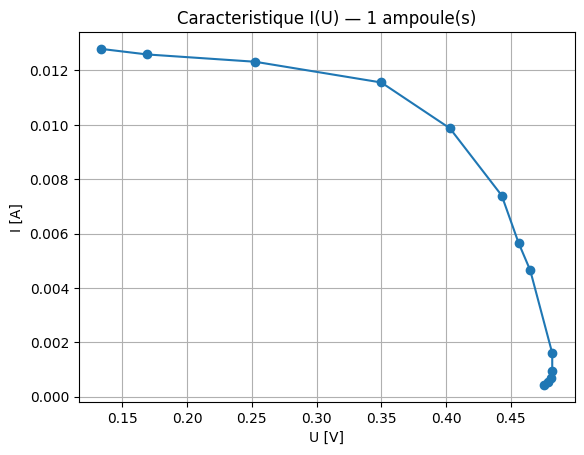

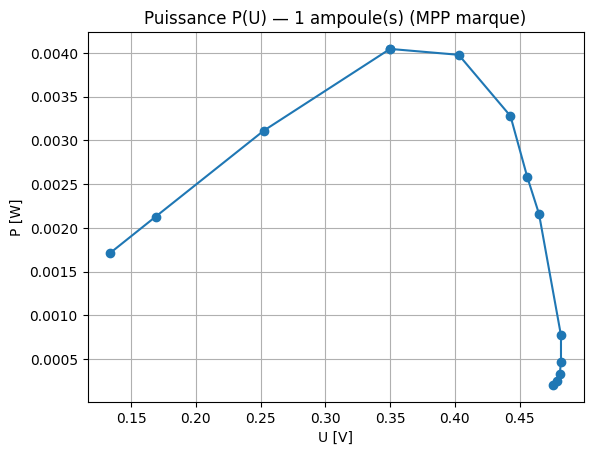

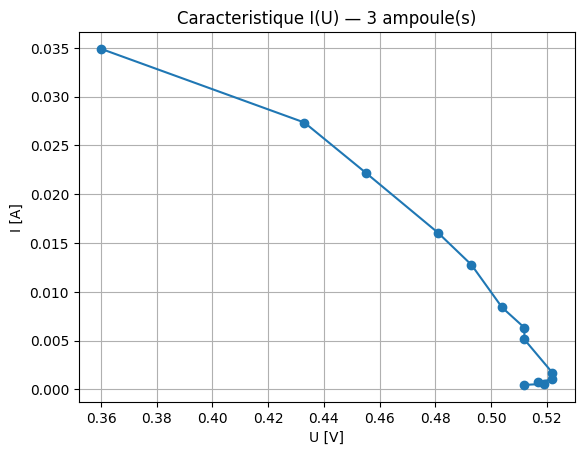

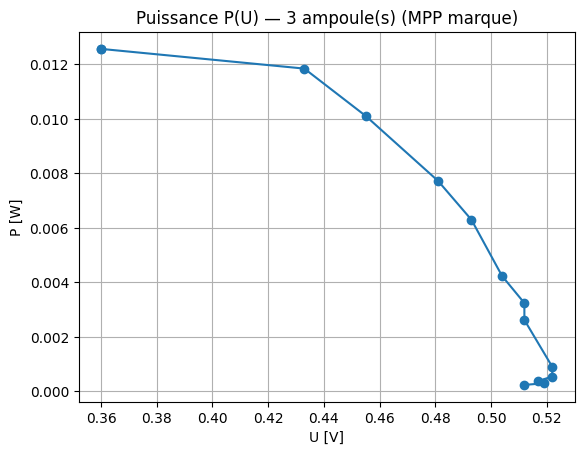

--- 1 ampoule(s) ---
U_mpp = 0.35 V, I_mpp = 0.01156 A, P_mpp = 0.004045 W
FF     = 0.6678 (def: P_mpp / (Isc*Uoc))
Pin    = 0.04375 W  --> eta = 0.09246

--- 3 ampoule(s) ---
U_mpp = 0.3601 V, I_mpp = 0.03489 A, P_mpp = 0.01257 W
FF     = 0.6499 (def: P_mpp / (Isc*Uoc))
Pin    = 0.1313 W  --> eta = 0.09574



In [30]:

# Parametres d'entree
# Aire eclairee (cm^2) — a mesurer durant le labo
aire_cm2 = 25

# Irradiance fournie par une ampoule a 8 V (mW/cm^2) — valeur fournisseur
irradiance_par_ampoule_mWcm2 = 1.75

# -------- Serie A (ex. 1 ampoule) --------
Uoc_A_V = 0.483
Isc_A_A = 0.01254
nb_ampoules_A = 1

data_IV_A = pd.DataFrame({
    "R_ohm": [  1101,    900.0,    700.0,    500,    300.6,    100.1,     80.5,     60.1,     40.9,      30.5,      20.4,      15.5, 10.5],
    "U_V":   [ 0.476,   479e-3,   481e-3, 482e-3,   482e-3,   465e-3,   456e-3,   443e-3,   403e-3,    350e-3,  252.5e-3,  169.1e-3, 133.8e-3],
    "I_A":   [429e-6,   530e-6,   684e-6, 958e-6, 1.598e-3, 4.647e-3, 5.656e-3, 7.398e-3, 9.870e-3, 11.557e-3, 12.320e-3, 12.589e-3, 12.792e-3],
})
 
# -------- Serie B (ex. 3 ampoules) --------
Uoc_B_V = 0.522
Isc_B_A = 37.04e-3
nb_ampoules_B = 3

data_IV_B = pd.DataFrame({
    "R_ohm": [  1101,  900.0,    700.0,      500,      300.6,    100.1,     80.5,     60.1,     40.9,      30.5,      20.4,      15.5, 10.5],
    "U_V":   [ 0.512, 519e-3,   517e-3,   522e-3,     522e-3,   512e-3,   512e-3,   504e-3,   493e-3,    481e-3,    455e-3,   433.e-3, 360.1e-3],
    "I_A":   [462e-6, 573e-6,   735e-6, 1.043e-3,   1.730e-3, 5.120e-3, 6.329e-3, 8.396e-3, 12.77e-3, 16.055e-3, 22.216e-3, 27.352e-3, 34.894e-3],
})

display(data_IV_A.head())
display(data_IV_B.head())

def analyze_IV(df, Uoc, Isc, nb_ampoules, aire_cm2, irradiance_per_amp_mWcm2):
    df = df.copy()
    df["P_W"] = df["U_V"] * df["I_A"]
    # Recherche du MPP
    idx = df["P_W"].idxmax()
    U_mpp = df.loc[idx, "U_V"]
    I_mpp = df.loc[idx, "I_A"]
    P_mpp = df.loc[idx, "P_W"]
    # Calcul FF
    FF = (P_mpp) / (Isc * Uoc) if (Isc and Uoc) else np.nan
    # Puissance incidente (W)
    E_Wcm2 = (irradiance_per_amp_mWcm2 * nb_ampoules) / 1000.0  # mW/cm2 -> W/cm2
    Pin_W = E_Wcm2 * aire_cm2
    eta = P_mpp / Pin_W if Pin_W else np.nan
    return {
        "df": df, "U_mpp": U_mpp, "I_mpp": I_mpp, "P_mpp": P_mpp,
        "FF": FF, "Pin_W": Pin_W, "eta": eta
    }

res_A = analyze_IV(data_IV_A, Uoc_A_V, Isc_A_A, nb_ampoules_A, aire_cm2, irradiance_par_ampoule_mWcm2)
res_B = analyze_IV(data_IV_B, Uoc_B_V, Isc_B_A, nb_ampoules_B, aire_cm2, irradiance_par_ampoule_mWcm2)

def plot_IV_with_power(res, label):
    df = res["df"]
    # Plot I(U)
    plt.figure()
    plt.plot(df["U_V"], df["I_A"], marker='o')
    plt.xlabel("U [V]")
    plt.ylabel("I [A]")
    plt.title(f"Caracteristique I(U) — {label}")
    plt.grid(True)
    plt.show()
    # Plot P(U) + marquage MPP
    plt.figure()
    plt.plot(df["U_V"], df["P_W"], marker='o')
    plt.scatter([res["U_mpp"]], [res["P_mpp"]])
    plt.xlabel("U [V]")
    plt.ylabel("P [W]")
    plt.title(f"Puissance P(U) — {label} (MPP marque)")
    plt.grid(True)
    plt.show()

plot_IV_with_power(res_A, f"{nb_ampoules_A} ampoule(s)")
plot_IV_with_power(res_B, f"{nb_ampoules_B} ampoule(s)")

# Resumes
def resume(res, Uoc, Isc, label):
    print(f"--- {label} ---")
    print(f"U_mpp = {res['U_mpp']:.4g} V, I_mpp = {res['I_mpp']:.4g} A, P_mpp = {res['P_mpp']:.4g} W")
    print(f"FF     = {res['FF']:.4g} (def: P_mpp / (Isc*Uoc))")
    print(f"Pin    = {res['Pin_W']:.4g} W  --> eta = {res['eta']:.4g}")
    print()

resume(res_A, Uoc_A_V, Isc_A_A, f"{nb_ampoules_A} ampoule(s)")
resume(res_B, Uoc_B_V, Isc_B_A, f"{nb_ampoules_B} ampoule(s)")


## 4) Facteurs d'influence : (a) serie/parallele & ombrage, (b) angle d'incidence

### 4a) Serie / parallele & effets d'ombre
Mesures U_oc et I_sc pour des configurations 1-3 cellules, en parallele puis en serie, avec et sans recouvrement partiel (ombrage) d'une cellule.

### 4b) Angle d'incidence
Pour differents angles theta (en degres), mesures U_oc, I_sc et/ou des points (U,I) sous charge. Le code trace la puissance (par ex. U*I au point choisi, ou I_sc*U_oc comme proxy) en fonction de cos(theta) et fait un ajustement lineaire.


=== COURANT SANS OMBRAGE (3 cellules en série) ===
--------------------------------------------------
Configuration             |    Isc (A) |   Isc (mA)
------------------------------------------------------
Sans diode                |  1.625e-03 |      1.625
Avec diode                |  1.656e-03 |      1.656

=== COURANT AVEC OMBRAGE (3 cellules en série) ===
--------------------------------------------------
Configuration             |    Isc (A) |   Isc (mA)
------------------------------------------------------
1er recouvrement          |  4.220e-04 |      0.422
2ème recouvrement         |  1.422e-03 |      1.422


,nb_cellules,ombrage,Uoc_V,Isc_A
0,1,aucun,0.3962,0.001775
1,1,une_cellule_couverte,0.0053,0.000001
2,2,aucun,0.2965,0.003670
3,2,une_cellule_couverte,0.2340,0.001790
4,3,aucun,0.2727,0.005527
5,3,une_cellule_couverte,0.2447,0.003625


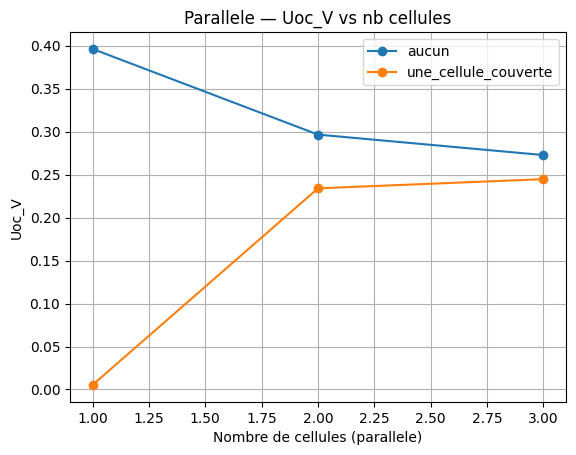

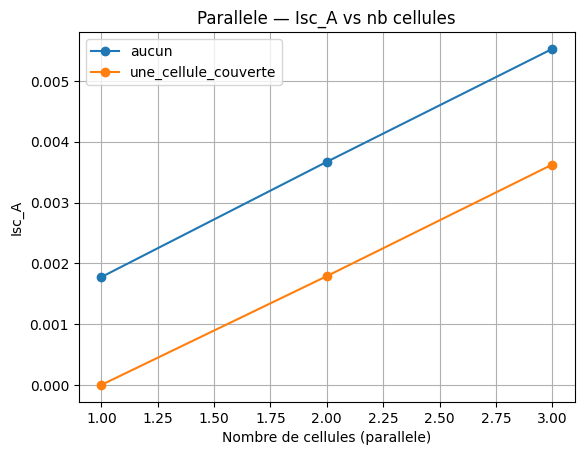

,nb_cellules,Uoc_ratio_cov/aucun,Isc_ratio_cov/aucun
0,1,0.013377,0.000563
1,2,0.789207,0.487738
2,3,0.897323,0.655871


In [7]:
# ===== Imports =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ====== Donnees SERIE (tension, courant / ou listes de courants) ======
# 3 cellules en serie:
sans_diode = [0.855, 1.625e-3]   # Uoc, Isc  (sans diode, pas d'ombrage)
sans_couvert = [0.867, 1.656e-3] # Uoc, Isc  (avec diode, pas d'ombrage)
premiere_couvert = [0.650e-3, 0.422e-3]  # essais de courants (ombrage 1)
deuxieme_couvert = [0.630e-3, 1.422e-3]  # essais de courants (ombrage 2)

# ====== Donnees PARALLELE (tableau direct, pas de fonction) ======
data_parallele = pd.DataFrame(
    [
        # nb_cellules, ombrage, Uoc_V, Isc_A
        [1, "aucun",                0.3962,   1.775e-3],
        [1, "une_cellule_couverte", 0.0053,   1.0e-6],
        [2, "aucun",                0.2965,   3.670e-3],
        [2, "une_cellule_couverte", 0.2340,   1.790e-3],
        [3, "aucun",                0.2727,   5.527e-3],
        [3, "une_cellule_couverte", 0.2447,   3.625e-3],
    ],
    columns=["nb_cellules","ombrage","Uoc_V","Isc_A"]
)
#display(data_parallele)

# ========= SERIE : PLOTS (courant uniquement) =========
Isc_sans_diode = float(sans_diode[1])
Isc_avec_diode = float(sans_couvert[1])
cov1 = float(premiere_couvert[1])
cov2 = float(deuxieme_couvert[1])

# --- Tableau 1 : sans diode / avec diode ---
print("\n=== COURANT SANS OMBRAGE (3 cellules en série) ===")
print("--------------------------------------------------")
print(f"{'Configuration':<25} | {'Isc (A)':>10} | {'Isc (mA)':>10}")
print("-"*54)
print(f"{'Sans diode':<25} | {Isc_sans_diode:>10.3e} | {Isc_sans_diode*1e3:>10.3f}")
print(f"{'Avec diode':<25} | {Isc_avec_diode:>10.3e} | {Isc_avec_diode*1e3:>10.3f}")

# --- Tableau 2 : recouvrements ---
print("\n=== COURANT AVEC OMBRAGE (3 cellules en série) ===")
print("--------------------------------------------------")
print(f"{'Configuration':<25} | {'Isc (A)':>10} | {'Isc (mA)':>10}")
print("-"*54)
print(f"{'1er recouvrement':<25} | {cov1:>10.3e} | {cov1*1e3:>10.3f}")
print(f"{'2ème recouvrement':<25} | {cov2:>10.3e} | {cov2*1e3:>10.3f}")


# ========= PARALLELE : récap + plots séparés =========
# Resume (moyenne si tu ajoutes d'autres essais plus tard)
sum_par = (data_parallele
           .groupby(["nb_cellules","ombrage"], as_index=False)[["Uoc_V","Isc_A"]]
           .mean())
display(sum_par)

# Courbes Uoc et Isc vs nb_cellules (parallele seulement)
for metric in ["Uoc_V", "Isc_A"]:
    plt.figure()
    for omb in ["aucun", "une_cellule_couverte"]:
        ss = sum_par[sum_par["ombrage"] == omb]
        plt.plot(ss["nb_cellules"], ss[metric], marker='o', label=omb)
    plt.xlabel("Nombre de cellules (parallele)")
    plt.ylabel(metric)
    plt.title(f"Parallele — {metric} vs nb cellules")
    plt.grid(True)
    plt.legend()
    plt.show()

# Tableau de pénalité (parallele seulement)
rows = []
for n in [1, 2, 3]:
    base = sum_par[(sum_par.nb_cellules==n) & (sum_par.ombrage=="aucun")]
    cov  = sum_par[(sum_par.nb_cellules==n) & (sum_par.ombrage=="une_cellule_couverte")]
    if len(base)==1 and len(cov)==1:
        u_ratio = cov["Uoc_V"].values[0] / base["Uoc_V"].values[0] if base["Uoc_V"].values[0] else np.nan
        i_ratio = cov["Isc_A"].values[0] / base["Isc_A"].values[0] if base["Isc_A"].values[0] else np.nan
        rows.append({"nb_cellules": n,
                     "Uoc_ratio_cov/aucun": u_ratio,
                     "Isc_ratio_cov/aucun": i_ratio})
penalty_par = pd.DataFrame(rows)
display(penalty_par)


## 5) Dimensionnement d'une petite installation (24 V DC)

Scenario: alimenter une TV (14 W) et un frigo (44 W) en 24 V DC par temps clair. Utiliser U_MPP et eta mesures en section 3.

Entrees: P_load, irradiance E (par defaut 1000 W/m^2), eta, U_MPP, marges (ombrage ponctuel, pertes).

Le code dimensionne l'aire PV et une combinaison simple de cellules/modules (serie/parallele) pour atteindre 24 V au MPP.

In [ ]:

# ---- Entrees principales ----
P_TV_W = 14.0
P_frigo_W = 44.0
P_load_W = P_TV_W + P_frigo_W

# Irradiance (W/m^2)
E_Wm2 = 1000.0

# Resultats (section 3, a reprendre apres calcul reel)
eta = np.nan        # rendement mesure (0..1)
U_mpp_V = np.nan    # tension au MPP pour un module
I_mpp_A = np.nan    # courant au MPP pour un module
P_mpp_W = np.nan    # puissance au MPP d'un module

# Marges
margin_losses = 0.15     # 15% pertes diverses
margin_shade = 0.10      # 10% ombrage ponctuel

# ---- Calculs ----
P_needed_W = P_load_W * (1 + margin_losses + margin_shade)

# Aire PV requise (si eta au niveau module et E irradiance plane)
# P = eta * E * A  =>  A = P / (eta * E)
A_required_m2 = P_needed_W / (eta * E_Wm2) if (eta and not np.isnan(eta)) else np.nan

# Nombre de modules en serie pour 24 V au MPP
N_series = int(np.ceil(24.0 / U_mpp_V)) if (U_mpp_V and not np.isnan(U_mpp_V)) else np.nan

# Puissance d'une branche en serie (approx: N_series * P_mpp)
P_branch_W = N_series * P_mpp_W if (not np.isnan(N_series) and P_mpp_W and not np.isnan(P_mpp_W)) else np.nan

# Nombre de branches en parallele
N_parallel = int(np.ceil(P_needed_W / P_branch_W)) if (P_branch_W and not np.isnan(P_branch_W)) else np.nan

# Puissance totale nominale au MPP
P_total_W = N_series * N_parallel * P_mpp_W if (not np.isnan(N_series) and not np.isnan(N_parallel) and P_mpp_W) else np.nan

# ---- Resume ----
print("=== Dimensionnement PV (brouillon base sur mesures) ===")
print(f"Charge: TV {P_TV_W:.1f} W + frigo {P_frigo_W:.1f} W -> P_load = {P_load_W:.1f} W")
print(f"Marges: pertes {margin_losses*100:.0f} %, ombrage {margin_shade*100:.0f} % -> P_needed = {P_needed_W:.1f} W")
print(f"Irradiance E = {E_Wm2:.0f} W/m^2, rendement eta = {eta}")
print(f"Aire PV requise ~ {A_required_m2:.3f} m^2")
print(f"U_mpp (module) ~ {U_mpp_V} V  -> N_series ~ {N_series}")
print(f"P_mpp (module) ~ {P_mpp_W} W  -> N_parallel ~ {N_parallel}")
print(f"Puissance totale nominale ~ {P_total_W} W")
print("\nRemarques:")
print("- Ajuster les marges selon la realite (temperature elevee -> U_mpp baisse, eta diminue).")
print("- Prevoir des diodes bypass pour limiter l'effet d'un ombrage local en serie.")
print("- Si panneaux commerciaux, remplacer U_mpp/P_mpp par les spec STC.")
